In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Implementação

## 1. Implemente os seguintes métodos:

### a. Rede MLP para classificação
### &emsp;i. Apenas uma camada oculta (recebe o tamanho dessa camada como parâmetro)
### &emsp;ii. Pode assumir que tem apenas um neurônio de saída

In [2]:
from ann import MLP

### b. KNN
### &emsp;i. Recebe k como parâmetro

In [3]:
from knn import KNN

## 2. Usaremos a funções acurácia, plot_confusion_matrix e plot_boundaries do trabalho passado

In [4]:
from sklearn.metrics import confusion_matrix


def accuracy(y_true, y_pred):
    return (len(y_true) - np.count_nonzero(y_true - y_pred)) / len(y_true)


def plot_confusion_matrix(X, y, clf):
    labels = np.unique(y)

    y_true = y
    y_pred = clf.predict(X)

    cm = confusion_matrix(y, y_pred, labels)
    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)

    thresh = cm.max() / 2

    for (i, j) in itertools.product(range(cm.shape[0]),
                                    range(cm.shape[1])):
        plt.text(j, i, '{:,}'.format(cm[i, j]),
                 horizontalalignment='center', color=('white' if cm[i,
                 j] > thresh else 'black'))

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
def plot_boundaries(X, y, clf):
    (x_min, x_max) = (X[:, 0].min() - .5, X[:, 0].max() + .5)
    (y_min, y_max) = (X[:, 1].min() - .5, X[:, 1].max() + .5)

    h = .02

    (xx, yy) = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,
                           y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
                cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

## 3. Implementar função k_fold(X, y, k, metodo) que execute a validação cruzada k-fold sobre o conjunto de dados X,y usando o método método reportanto o erro usando função acurácia (usar k=5). Não precisa implementar parte de valição e teste, implementar somente o fluxo principal (como está no primeiro slide sobre k-fold) 

In [5]:
def k_fold(X, y, k, method):
    size = np.shape(X)[0]
    fold_size = size // k
    X_folds = np.array_split(X, fold_size)
    y_folds = np.array_split(y, fold_size)
    k_fold_accuracy = []
    
    for i in range(k):
        X_train = np.concatenate([X_folds[j] for j in np.arange(k)[np.arange(k) != i]])
        X_test = X_folds[i]
        y_train = np.concatenate([y_folds[j] for j in np.arange(k)[np.arange(k) != i]])
        y_test = y_folds[i]
        
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        
        k_fold_accuracy.append(accuracy(y_test, y_pred))
        
    return k_fold_accuracy

# Dado

## 1. Carregar data1.txt

In [6]:
from utils import MinMaxScaler

dataset = np.genfromtxt("./data/data1.txt", delimiter=",")

mms = MinMaxScaler()

mms.fit(dataset)

normalized_dataset = mms.transform(dataset)

## 2. As duas primeiras colunas são as características e a última coluna é a variável alvo

In [7]:
from utils import train_test_split

X, y = normalized_dataset[:, :-1], normalized_dataset[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)

# Relatório

## 1. Reporte o que se pede usando os métodos KNN (com k=1,2 e3) e MLP (como número de neurônios na camada oculta 2,3 e 4):

### a. O erro do 5-fold

#### KNN, K = 1

In [8]:
knn = KNN(k=1)

k_fold(X, y, 5, knn)

[1.0, 1.0, 0.8, 1.0, 1.0]

#### KNN, K = 2

In [9]:
knn = KNN(k=2)

k_fold(X, y, 5, knn)

[1.0, 1.0, 0.8, 1.0, 1.0]

#### KNN, K = 3

In [10]:
knn = KNN(k=3)

k_fold(X, y, 5, knn)

[1.0, 0.6, 0.6, 0.8, 0.8]

#### MLP, 2 neurônios

In [11]:
mlp = MLP(2)

k_fold(X, y, 5, mlp)

[1.0, 0.6, 0.8, 0.6, 1.0]

#### MLP, 3 neurônios

In [12]:
mlp = MLP(3)

k_fold(X, y, 5, mlp)

[1.0, 1.0, 0.6, 0.8, 1.0]

#### MLP, 4 neurônios

In [13]:
mlp = MLP(4)

k_fold(X, y, 5, mlp)

[1.0, 1.0, 0.6, 0.8, 0.6]

### b. O dado em um gráfico de dispersão com as fronteiras de separação produzidas pelo método treinado com o conjunto de dados inteiro

#### KNN, K = 1

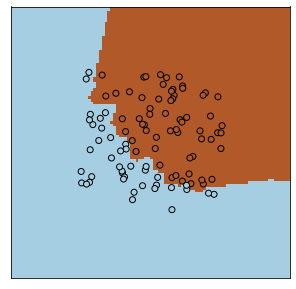

In [14]:
knn = KNN(k=1)
knn.fit(X, y)

plot_boundaries(X, y, knn)

#### KNN, K = 2

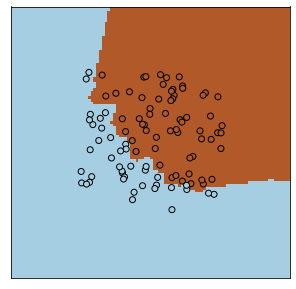

In [15]:
knn = KNN(k=2)
knn.fit(X, y)

plot_boundaries(X, y, knn)

#### KNN, K = 3

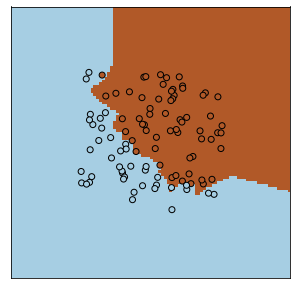

In [16]:
knn = KNN(k=3)
knn.fit(X, y)

plot_boundaries(X, y, knn)

#### MLP, 2 neurônios

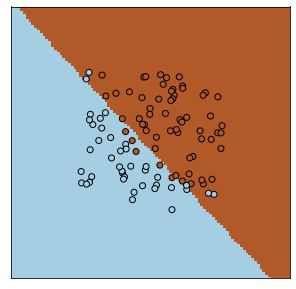

In [17]:
mlp = MLP(2)
mlp.fit(X, y)

plot_boundaries(X, y, mlp)

#### MLP, 3 neurônios

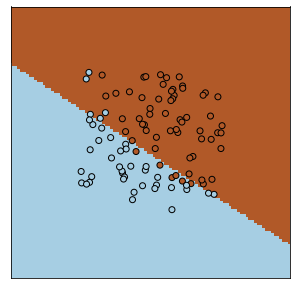

In [18]:
mlp = MLP(3)
mlp.fit(X, y)

plot_boundaries(X, y, mlp)

#### MLP, 4 neurônios

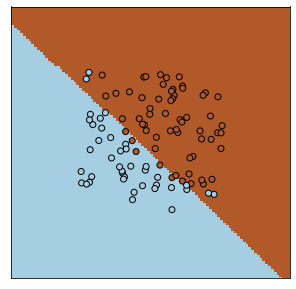

In [19]:
mlp = MLP(4)
mlp.fit(X, y)

plot_boundaries(X, y, mlp)